In [248]:
import random
from numpy.random import default_rng
import pandas as pd

'''
Generate 10000 samples
'''
sample_size = 10000
mu_0 = [-1,1,-1,1]
mu_1 = [1,1,1,1]
sig_0 = [[2, -0.5, 0.3, 0],
        [-0.5, 1, -0.5, 0],
        [0.3, -0.5, 1, 0],
        [0, 0, 0, 2]]
sig_1 = [[1, 0.3, -0.2, 0],
        [0.3, 2, 0.3, 0],
        [-0.2, 0.3, 1, 0],
        [0, 0, 0, 3]]
py_0 = 0.7
py_1 = 0.3

size_0 = 0
size_1 = 0
for i in range(0, sample_size):
    if random.random() < py_0:
        size_0 = size_0 + 1
    else:
        size_1 = size_1 + 1

rng = default_rng()
samples_0 = rng.multivariate_normal(mean=mu_0, cov=sig_0, size=size_0)
samples_0 = pd.DataFrame(samples_0, columns=['x','y','z','w'])
samples_0['True class label'] = 0

In [249]:
samples_0

,x,y,z,w,True class label
0,1.130226,-0.099001,-0.038791,2.492009,0
1,-1.087016,1.015683,-2.622440,2.430526,0
2,-0.367270,-0.181923,0.770173,1.829523,0
3,-1.255701,1.031395,-1.571174,0.423656,0
4,-2.497653,2.742498,-1.707375,1.293143,0
...,...,...,...,...,...
7004,-2.463063,1.023014,0.923782,1.131148,0
7005,-2.057421,1.674673,-1.168700,1.595907,0
7006,-1.023515,2.534013,-4.582259,1.739866,0
7007,-2.716628,1.299864,-0.074554,0.958592,0


In [250]:
samples_1 = rng.multivariate_normal(mean=mu_1, cov=sig_1, size=size_1)
samples_1 = pd.DataFrame(samples_1, columns=['x','y','z','w'])
samples_1['True class label'] = 1

In [251]:
samples_1

,x,y,z,w,True class label
0,0.115711,0.128779,2.590727,0.535605,1
1,0.657569,3.260814,-0.036978,3.054145,1
2,1.802204,0.696390,1.063967,4.066408,1
3,2.259612,1.785895,1.431747,2.169440,1
4,0.901518,4.122730,2.582646,1.201857,1
...,...,...,...,...,...
2986,0.796848,1.398867,1.435340,-1.524183,1
2987,0.743307,1.147388,0.132355,5.319497,1
2988,-0.159845,-0.744189,-0.723637,2.330965,1
2989,0.175970,0.312378,-0.132709,1.141623,1


In [252]:
samples = pd.concat([samples_0,samples_1], ignore_index=True)
samples

,x,y,z,w,True class label
0,1.130226,-0.099001,-0.038791,2.492009,0
1,-1.087016,1.015683,-2.622440,2.430526,0
2,-0.367270,-0.181923,0.770173,1.829523,0
3,-1.255701,1.031395,-1.571174,0.423656,0
4,-2.497653,2.742498,-1.707375,1.293143,0
...,...,...,...,...,...
9995,0.796848,1.398867,1.435340,-1.524183,1
9996,0.743307,1.147388,0.132355,5.319497,1
9997,-0.159845,-0.744189,-0.723637,2.330965,1
9998,0.175970,0.312378,-0.132709,1.141623,1


In [253]:
from scipy.stats import multivariate_normal
'''
Part A-2
'''
# Implement the classifier
lr = [] # likelihood ratio list
for i in range(0,sample_size):
    x = samples.iloc[i].to_numpy()[:-1]
    lr.append(multivariate_normal.pdf(x, mu_1, sig_1)/multivariate_normal.pdf(x, mu_0, sig_0))
samples['Likelihood ratio'] = lr
samples

,x,y,z,w,True class label,Likelihood ratio
0,1.130226,-0.099001,-0.038791,2.492009,0,1.740561e+00
1,-1.087016,1.015683,-2.622440,2.430526,0,3.002038e-05
2,-0.367270,-0.181923,0.770173,1.829523,0,1.205189e+00
3,-1.255701,1.031395,-1.571174,0.423656,0,2.375007e-04
4,-2.497653,2.742498,-1.707375,1.293143,0,1.852465e-07
...,...,...,...,...,...,...
9995,0.796848,1.398867,1.435340,-1.524183,1,3.061321e+02
9996,0.743307,1.147388,0.132355,5.319497,1,1.218830e+01
9997,-0.159845,-0.744189,-0.723637,2.330965,1,2.960745e-01
9998,0.175970,0.312378,-0.132709,1.141623,1,3.873438e-01


In [290]:
true_pos_prob = [] # false_neg_prob = 1 - true_pos_prob
false_pos_prob = []
gammas = []
for gamma in range(0,200,1):
    num_of_true_pos = 0
    num_of_false_pos = 0
    gammas.append(gamma/10)
    for i in range(0,sample_size):
        sample_lr = samples.iloc[i]
        if (sample_lr[-1] > gamma/10) and (sample_lr[-2] == 1):
            num_of_true_pos = num_of_true_pos + 1
        elif (sample_lr[-1] > gamma/10) and (sample_lr[-2] == 0):
            num_of_false_pos = num_of_false_pos + 1
    true_pos_prob.append(num_of_true_pos/len(samples[samples['True class label']==1]))
    false_pos_prob.append(num_of_false_pos/len(samples[samples['True class label']==0]))

In [337]:
roc = pd.DataFrame()
roc['Gamma'] = gammas
roc['True positive prob.'] = true_pos_prob
roc['False positive prob.'] = false_pos_prob
roc

,Gamma,True positive prob.,False positive prob.
0,0.0,1.000000,1.000000
1,0.1,0.992645,0.279070
2,0.2,0.983283,0.228991
3,0.3,0.975928,0.196890
4,0.4,0.967904,0.176202
...,...,...,...
195,19.5,0.556336,0.006706
196,19.6,0.555667,0.006563
197,19.7,0.555333,0.006563
198,19.8,0.554664,0.006563


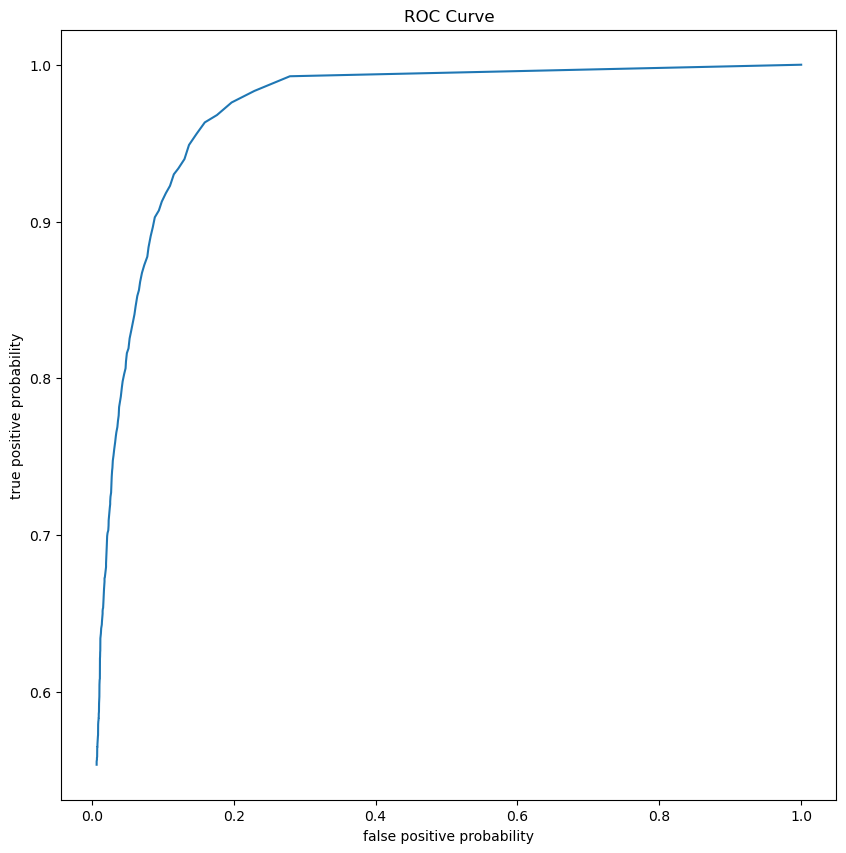

In [338]:
# Plot ROC curve
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(false_pos_prob, true_pos_prob)
ax.set_title('ROC Curve')
ax.set_xlabel('false positive probability')
ax.set_ylabel('true positive probability')
ax.set_axisbelow(True)

In [339]:
'''
Part A-3
'''
# Calculate an empirical minimum prob. error
prob_err = []
for i in range(roc.shape[0]):
    roc_point = roc.iloc[i]
    prob_err.append(roc_point[2]*py_0+(1-roc_point[1])*py_1)
roc['Probability error'] = prob_err

In [340]:
roc

,Gamma,True positive prob.,False positive prob.,Probability error
0,0.0,1.000000,1.000000,0.700000
1,0.1,0.992645,0.279070,0.197555
2,0.2,0.983283,0.228991,0.165309
3,0.3,0.975928,0.196890,0.145044
4,0.4,0.967904,0.176202,0.132970
...,...,...,...,...
195,19.5,0.556336,0.006706,0.137793
196,19.6,0.555667,0.006563,0.137894
197,19.7,0.555333,0.006563,0.137994
198,19.8,0.554664,0.006563,0.138195


In [341]:
roc['Probability error'].min()

0.08897517205633165

In [342]:
roc['Probability error'].idxmin()

24

In [345]:
roc.iloc[24]

Gamma                   2.400000
True positive prob.     0.852558
False positive prob.    0.063918
Probability error       0.088975
Name: 24, dtype: float64

In [351]:
# Calculate theoretical minimum prob. error
theo_gamma = py_0/py_1
num_of_true_pos = 0
num_of_false_pos = 0
for i in range(0,sample_size):
    sample_lr = samples.iloc[i]
    if (sample_lr[-1] > theo_gamma) and (sample_lr[-2] == 1):
        num_of_true_pos = num_of_true_pos + 1
    elif (sample_lr[-1] > theo_gamma) and (sample_lr[-2] == 0):
        num_of_false_pos = num_of_false_pos + 1
theo_true_pos_prob = num_of_true_pos/len(samples[samples['True class label']==1])
theo_false_pos_prob = num_of_false_pos/len(samples[samples['True class label']==0])
theo_prob_err = theo_false_pos_prob*py_0 + (1-theo_true_pos_prob)*py_1
print(theo_true_pos_prob, theo_false_pos_prob, theo_prob_err)

0.8545636910732196 0.06562990440861749 0.08957182576406636


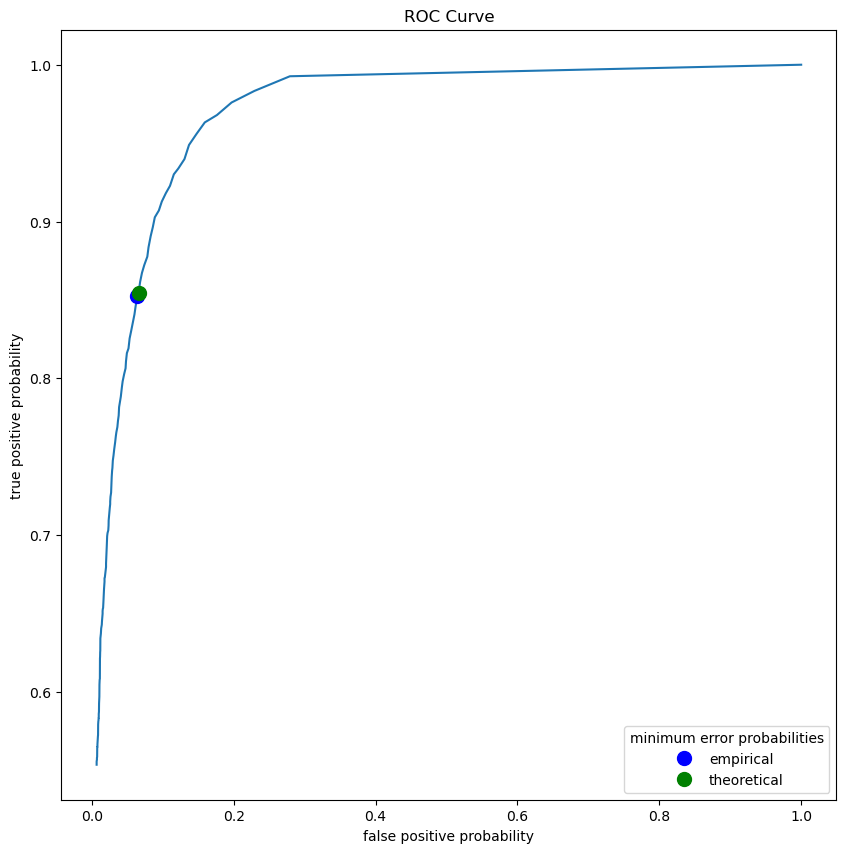

In [353]:
# Mark the empirical and theoretical minimum prob. of error on the ROC curve
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(false_pos_prob, true_pos_prob)
ax.set_title('ROC Curve')
ax.set_xlabel('false positive probability')
ax.set_ylabel('true positive probability')
ax.set_axisbelow(True)
ax.plot(roc.iloc[24]['False positive prob.'],roc.iloc[24]['True positive prob.'], 'bo', label='empirical', markersize=10)
ax.plot(theo_false_pos_prob,theo_true_pos_prob,'go',label='theoretical',markersize=10)
ax.legend(title='minimum error probabilities',loc='lower right')

In [358]:
'''
Part B
'''
# Repeat Part A with incorrect cov. matrices
incorrect_sig_0 = [[2, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 2]]
incorrect_sig_1 = [[1, 0, 0, 0],
                   [0, 2, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 3]]

part_b_samples = samples # copy the 10k samples 

# Implement the classifier
incorrect_lr = [] # likelihood ratio list
for i in range(0,sample_size):
    x = part_b_samples.iloc[i].to_numpy()[:-2]
    incorrect_lr.append(multivariate_normal.pdf(x, mu_1, incorrect_sig_1)/multivariate_normal.pdf(x, mu_0, incorrect_sig_0))
part_b_samples['Likelihood ratio'] = incorrect_lr
part_b_samples

,x,y,z,w,True class label,Likelihood ratio
0,1.130226,-0.099001,-0.038791,2.492009,0,3.792898
1,-1.087016,1.015683,-2.622440,2.430526,0,0.000580
2,-0.367270,-0.181923,0.770173,1.829523,0,2.483240
3,-1.255701,1.031395,-1.571174,0.423656,0,0.002895
4,-2.497653,2.742498,-1.707375,1.293143,0,0.000223
...,...,...,...,...,...,...
9995,0.796848,1.398867,1.435340,-1.524183,1,55.992027
9996,0.743307,1.147388,0.132355,5.319497,1,10.475926
9997,-0.159845,-0.744189,-0.723637,2.330965,1,0.289967
9998,0.175970,0.312378,-0.132709,1.141623,1,0.710306


In [359]:
true_pos_prob = [] # false_neg_prob = 1 - true_pos_prob
false_pos_prob = []
gammas = []
for gamma in range(0,200,1):
    num_of_true_pos = 0
    num_of_false_pos = 0
    gammas.append(gamma/10)
    for i in range(0,sample_size):
        sample_lr = part_b_samples.iloc[i]
        if (sample_lr[-1] > gamma/10) and (sample_lr[-2] == 1):
            num_of_true_pos = num_of_true_pos + 1
        elif (sample_lr[-1] > gamma/10) and (sample_lr[-2] == 0):
            num_of_false_pos = num_of_false_pos + 1
    true_pos_prob.append(num_of_true_pos/len(samples[samples['True class label']==1]))
    false_pos_prob.append(num_of_false_pos/len(samples[samples['True class label']==0]))
incorrect_roc = pd.DataFrame()
incorrect_roc['Gamma'] = gammas
incorrect_roc['True positive prob.'] = true_pos_prob
incorrect_roc['False positive prob.'] = false_pos_prob
incorrect_roc

,Gamma,True positive prob.,False positive prob.
0,0.0,1.000000,1.000000
1,0.1,0.992310,0.324012
2,0.2,0.985958,0.260237
3,0.3,0.979940,0.224426
4,0.4,0.972584,0.197318
...,...,...,...
195,19.5,0.563357,0.021258
196,19.6,0.561685,0.021258
197,19.7,0.560682,0.021258
198,19.8,0.560013,0.021116


0.8692744901370779 0.08089599086888287 0.09584484656709463


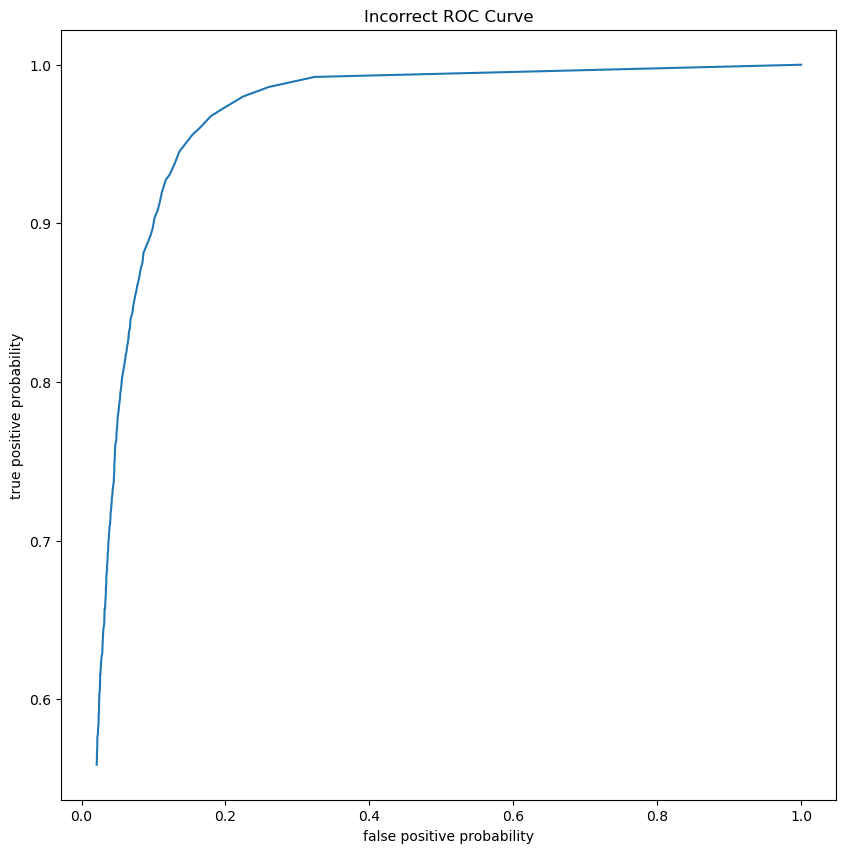

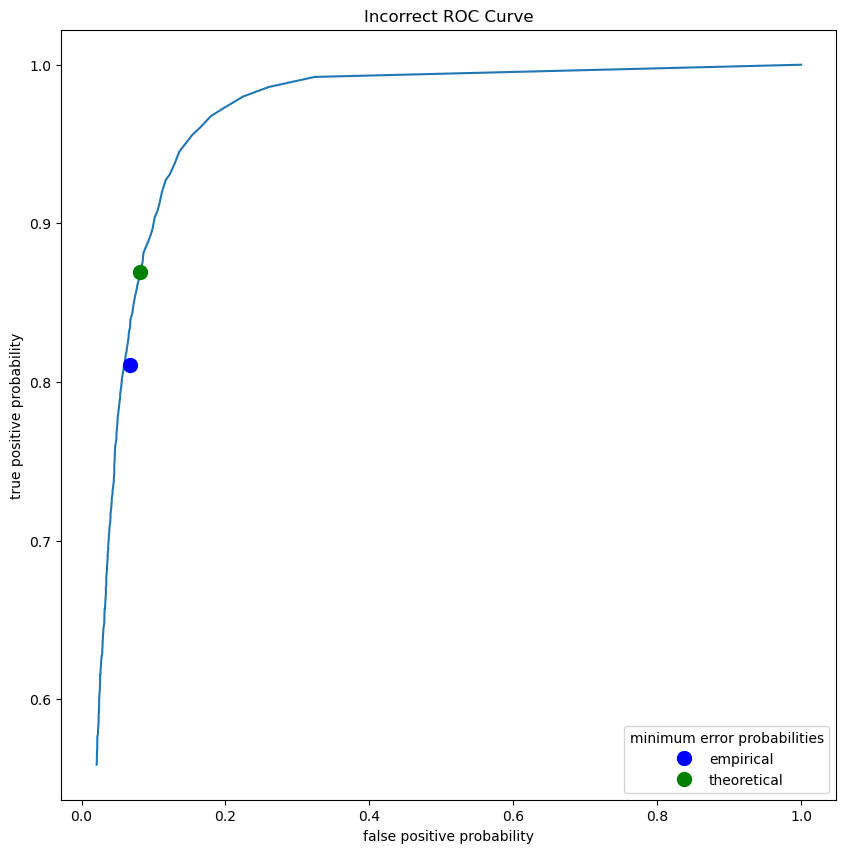

In [362]:
# Plot ROC curve
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(false_pos_prob, true_pos_prob)
ax.set_title('Incorrect ROC Curve')
ax.set_xlabel('false positive probability')
ax.set_ylabel('true positive probability')
ax.set_axisbelow(True)

# Calculate an empirical minimum prob. error
prob_err = []
for i in range(roc.shape[0]):
    roc_point = incorrect_roc.iloc[i]
    prob_err.append(roc_point[2]*py_0+(1-roc_point[1])*py_1)
incorrect_roc['Probability error'] = prob_err

# Calculate theoretical minimum prob. error
theo_gamma = py_0/py_1
num_of_true_pos = 0
num_of_false_pos = 0
for i in range(0,sample_size):
    sample_lr = part_b_samples.iloc[i]
    if (sample_lr[-1] > theo_gamma) and (sample_lr[-2] == 1):
        num_of_true_pos = num_of_true_pos + 1
    elif (sample_lr[-1] > theo_gamma) and (sample_lr[-2] == 0):
        num_of_false_pos = num_of_false_pos + 1
theo_true_pos_prob = num_of_true_pos/len(samples[samples['True class label']==1])
theo_false_pos_prob = num_of_false_pos/len(samples[samples['True class label']==0])
theo_prob_err = theo_false_pos_prob*py_0 + (1-theo_true_pos_prob)*py_1
print(theo_true_pos_prob, theo_false_pos_prob, theo_prob_err)

# Mark the empirical and theoretical minimum prob. of error on the ROC curve
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(false_pos_prob, true_pos_prob)
ax.set_title('Incorrect ROC Curve')
ax.set_xlabel('false positive probability')
ax.set_ylabel('true positive probability')
ax.set_axisbelow(True)
ax.plot(incorrect_roc.iloc[incorrect_roc['Probability error'].idxmin()]['False positive prob.'],roc.iloc[roc['Probability error'].idxmin()]['True positive prob.'], 'bo', label='empirical', markersize=10)
ax.plot(theo_false_pos_prob,theo_true_pos_prob,'go',label='theoretical',markersize=10)
ax.legend(title='minimum error probabilities',loc='lower right')

0.09578361278728466